<h2> Table of contents</h2>
1. Introduction
2. Import libraries
3. #############
4. ##########
5. ###############
6. ###############
7. ###############
8. ###############
9. ###############
10. ###############
11. ###############
12. ###############
13. Conclusion

<h3><u>Instructions</u></h3>

<p>something good</p>

<h3><u>Import libraries</u></h3>

In [57]:
import pandas as pd
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows',4000)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize,word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import scipy.stats as stats
iopub_data_rate_limit=10000000000
plt.rcParams["patch.force_edgecolor"] = True



<h3><u>Upload Annual_Crime_Austin_2014_to_2016_update.csv </u></h3>

In [58]:
df_Crime_Austin_2014_to_2016 = pd.read_csv('Crime_Samples_2014_to_2016.csv')
df_Crime_Austin_2014_to_2016.head()


,Offense_Description,Report_Date,Full_Address
0,Theft: All Other Larceny,06/26/2014 12:00:00 AM,3300 FOOTHILL DR ...
1,Theft: Auto Theft,07/05/2014 12:00:00 AM,4500 BLOCK CRAIGWOOD DR ...
2,Theft: BOV,05/12/2014 12:00:00 AM,1719 BLUEBONNET LN ...
3,Burglary: Breaking & Entering,10/20/2014 12:00:00 AM,1227 NEWNING AVE ...
4,Theft: All Other Larceny,03/21/2014 12:00:00 AM,10800 PLAINS TRL ...


In [310]:
df_Crime_Austin_2014_to_2016.Offense_Description.unique()

array(['Theft: All Other Larceny', 'Theft: Auto Theft', 'Theft: BOV',
       'Burglary: Breaking & Entering', 'Aggravated Assault',
       'Theft: Shoplifting', 'Theft: Auto Parts',
       'Homicide: Murder & Non-negligent Manslaughter',
       'Theft: Pocket Picking', 'Robbery', 'Theft: Coin Op Machine',
       'Theft: from Building', 'Theft: Purse Snatching', 'Theft',
       'Burglary', 'Agg Assault', 'Murder'], dtype=object)

<h3>Upload Final__Generated_Yelp_API_Sentiment_Analysis.csv</h3>

In [59]:
df_Yelp_API = pd.read_csv('Final__Generated_Yelp_API_Sentiment_Analysis.csv')
df_Yelp_API.head()

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,Yelp_Url,Price,First_Timestamp,First_Review,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Timestamp,Second_Review,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Timestamp,Third_Review,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,96,TX,78745,https://www.yelp.com/biz/urban-mattress-south-...,$$,2017-11-15 18:16:20,I was searching for a comfortable mattress and...,29,3,0.125,0.083,0.792,0.2732,2017-08-17 21:43:53,I was helped by a Hannah at this store and she...,30,2,0.158,0.000,0.842,0.4803,2017-03-10 17:50:56,Troy was great. Very knowledgeable on mattress...,32,5,0.410,0.0,0.590,0.9360
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,124,TX,78749,https://www.yelp.com/biz/healthy-pet-austin?hr...,NaN,2017-10-19 17:27:34,Healthy Pet has a great selection of cat & dog...,31,1,0.245,0.000,0.755,0.7783,2017-09-21 16:35:13,This location is just as helpful as the Lakeli...,31,3,0.180,0.000,0.820,0.6705,2017-12-03 15:50:21,Excellent service great variety of dog toys. ...,29,2,0.382,0.0,0.618,0.9274
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,109,TX,78735,https://www.yelp.com/biz/toast-entertainment-a...,NaN,2017-11-14 10:04:52,ToastEnt was the PERFECT match for our wedding...,33,2,0.216,0.000,0.784,0.8001,2017-12-04 19:23:01,I can't even tell you how pleased we were with...,37,3,0.246,0.000,0.754,0.8583,2017-10-23 18:36:18,I was very impressed with how professional our...,33,3,0.329,0.0,0.671,0.9149
3,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,112,TX,78735,https://www.yelp.com/biz/mercedes-flowers-aust...,$$,2017-10-24 06:22:36,Update - just ordered again from Mercedes. In ...,31,3,0.233,0.000,0.767,0.7712,2017-08-08 19:01:15,"I don't even know how to begin, but I can hone...",34,2,0.372,0.000,0.628,0.9504,2017-04-01 14:42:31,Absolutely fantastic! Great storage for flower...,30,4,0.413,0.0,0.587,0.9409
4,zen-well-austin,Zen Well,5.0,reflexology,Austin,188,TX,78745,https://www.yelp.com/biz/zen-well-austin?hrid=...,NaN,2017-11-12 12:41:10,This was amazing! Dawn blew me away. She was s...,36,4,0.112,0.091,0.797,0.2003,2017-10-30 12:18:56,"Overall, a very unique massage experience!\n\n...",33,4,0.119,0.087,0.794,0.2003,2017-08-07 12:31:34,Zen Well made me more satisfied after leaving ...,34,3,0.184,0.0,0.816,0.6361


In [49]:
df_Yelp_API['First_Timestamp'] = pd.to_datetime(df_Yelp_API['First_Timestamp'])
df_Yelp_API['Second_Timestamp'] = pd.to_datetime(df_Yelp_API['Second_Timestamp'])
df_Yelp_API['Third_Timestamp'] = pd.to_datetime(df_Yelp_API['Third_Timestamp'])

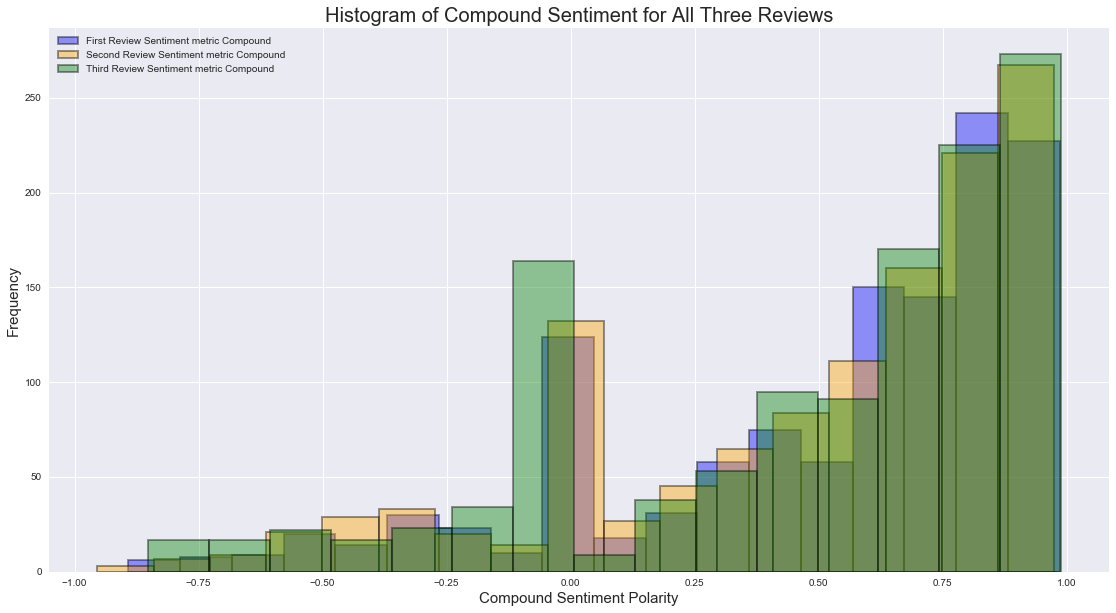

In [295]:
sns.set_style('darkgrid')
plt.figure(figsize=(19,10))
sns.distplot(df_Yelp_API['First_Review_Sentiment metric_Compound'],hist_kws=dict(edgecolor="k", linewidth=2), kde=False,label= 'First Review Sentiment metric Compound',color='b' )
sns.distplot(df_Yelp_API['Second_Review_Sentiment metric_Compound'], hist_kws=dict(edgecolor="k", linewidth=2),kde=False,label='Second Review Sentiment metric Compound',color='orange' )
sns.distplot(df_Yelp_API['Third_Review_Sentiment metric_Compound'],hist_kws=dict(edgecolor="k", linewidth=2), kde=False,label= 'Third Review Sentiment metric Compound',color='g' );

plt.xlabel( 'Compound Sentiment Polarity',fontsize=(15))
plt.ylabel( 'Frequency',fontsize=(15))
plt.title('Histogram of Compound Sentiment for All Three Reviews',fontsize=(20))
plt.legend();

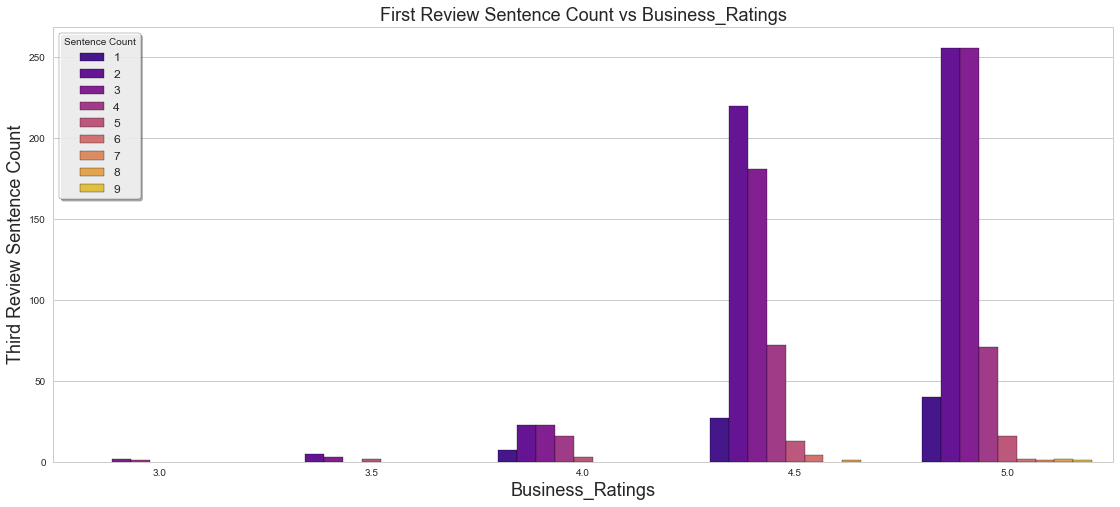

In [229]:
sns.set_style('whitegrid')
plt.figure(figsize=(19,8))
plt.rcParams["patch.force_edgecolor"] = True
sns.countplot(df_Yelp_API['Business_Ratings'],data=df_Yelp_API,hue=df_Yelp_API['First_Review_Sentence_Count'],palette='plasma');
plt.title('First Review Sentence Count vs Business_Ratings',fontsize=(18))
plt.xlabel('Business_Ratings',fontsize=(18))
plt.ylabel('Third Review Sentence Count',fontsize=(18));
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'large', title='Sentence Count',loc=2);

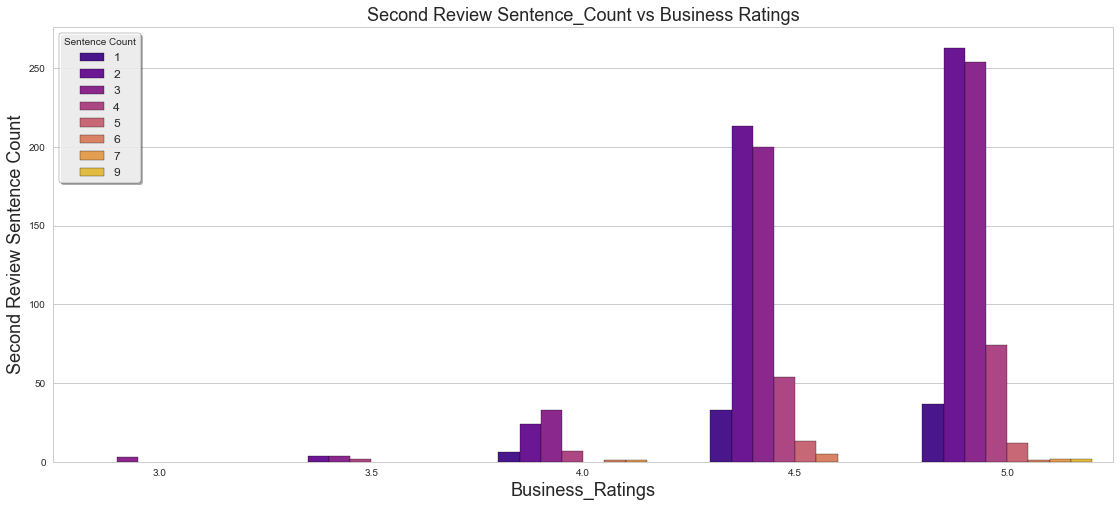

In [228]:
plt.figure(figsize=(19,8))
plt.rcParams["patch.force_edgecolor"] = True
plt.title('Second Review Sentence_Count vs Business Ratings',fontsize=(18))
sns.countplot(df_Yelp_API['Business_Ratings'],data=df_Yelp_API,hue=df_Yelp_API['Second_Review_Sentence_Count'],palette='plasma');
plt.xlabel('Business_Ratings',fontsize=(18))
plt.ylabel('Second Review Sentence Count',fontsize=(18));
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'large', title='Sentence Count',loc=2);

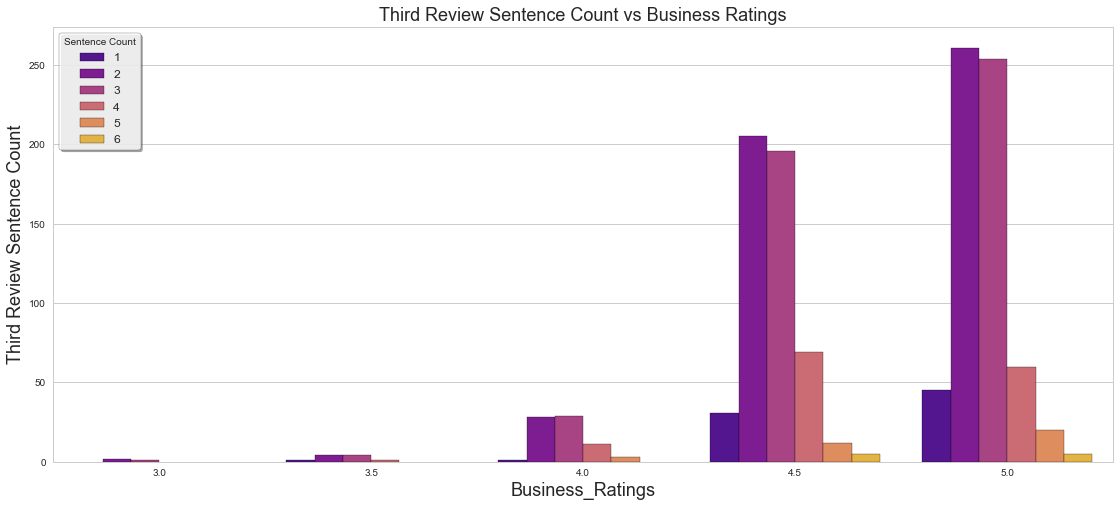

In [227]:
plt.figure(figsize=(19,8))
sns.set_style('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True
sns.countplot(df_Yelp_API['Business_Ratings'],data=df_Yelp_API,hue=df_Yelp_API['Third_Review_Sentence_Count'],palette='plasma');
plt.title('Third Review Sentence Count vs Business Ratings',fontsize=(18))
plt.xlabel('Business_Ratings',fontsize=(18))
plt.ylabel('Third Review Sentence Count',fontsize=(18))
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'large', title='Sentence Count',loc=2);

<h3><u>Top and Bottom 3 Business based on Reviews </u></h3>

<h3><u>Top 3 Business based on Reviews </u></h3>

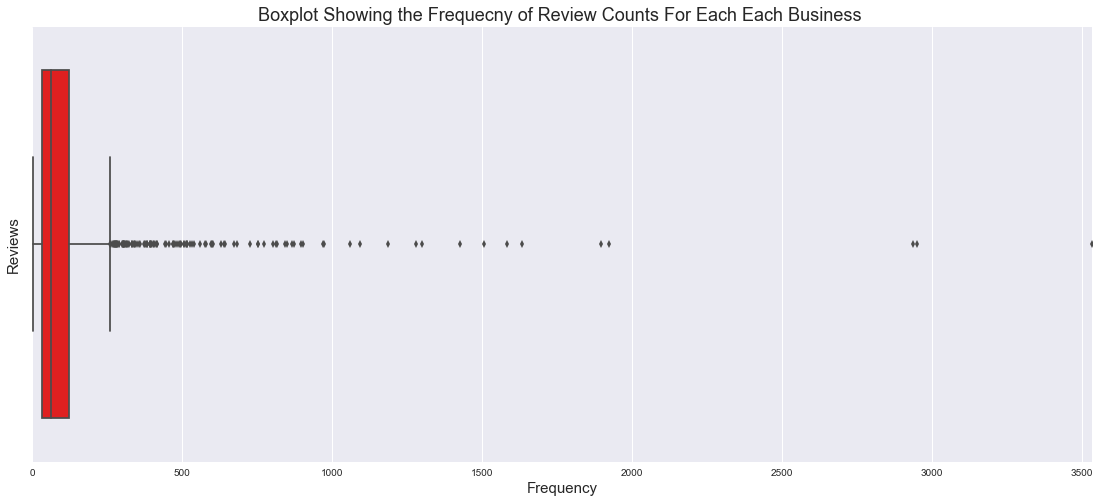

In [259]:
plt.figure(figsize=(19,8))
sns.boxplot(df_Yelp_API['Review_Counts'],data=df_Yelp_API,color='r')
plt.xlim(0,df_Yelp_API['Review_Counts'].max())
plt.xlabel( 'Frequency',fontsize=(15));
plt.ylabel( 'Reviews',fontsize=(15));
plt.title('Boxplot Showing the Frequecny of Review Counts For Each Each Business ',fontsize=(18));


In [285]:
df_Yelp_Top_Five_Review_Counts = df_Yelp_API[df_Yelp_API.Review_Counts >= 1400]

In [286]:
df_Yelp_Top_Five_Review_Counts.sort_values(by=['Review_Counts'],inplace=True)
df_Yelp_Top_Five_Review_Counts['%_Review_Counts'] =(df_Yelp_Top_Five_Review_Counts['Review_Counts']/sum(df_Yelp_Top_Five_Review_Counts.Review_Counts))*100

In [287]:
df_Yelp_Top_Five_Review_Counts = df_Yelp_Top_Five_Review_Counts[[ 'Business_Name', 
                                                                  '%_Review_Counts',
                                                                   'Business_Ratings', 
                                                                   'Category', 
                                                                   'City',
                                                                   'Zip',  
                                                                   'Price', 
                                
                                                                   'First_Review', 
                                                                   'First_Review_Sentiment metric_Compound', 


                                                                   'Second_Review', 
                                                                   'Second_Review_Sentiment metric_Compound', 


                                                                   'Third_Review',
                                                                   'Third_Review_Sentiment metric_Compound' ]]

In [288]:
df_Yelp_Top_Five_Review_Counts

,Business_Name,%_Review_Counts,Business_Ratings,Category,City,Zip,Price,First_Review,First_Review_Sentiment metric_Compound,Second_Review,Second_Review_Sentiment metric_Compound,Third_Review,Third_Review_Sentiment metric_Compound
375,Uchiko,7.349907,4.5,sushi,Austin,78756,$$$$,Just as good as I remember this place! It's be...,0.3682,The Emperor's New Clothes\nI'm confused as to ...,0.2023,"This restaurant is good, and I am only giving ...",0.3182
62,la Barbecue,7.772849,4.5,bbq,Austin,78702,$$,Wow. I am a Texas girls and grew up scouring o...,0.8591,This place is awesome. The bbq is so good (ha...,0.9115,I visited Austin for yoga and barbecue. Howeve...,0.0000
82,Torchy's Tacos,8.154529,4.5,tex-mex,Austin,78704,$,First experience at a Torchy's Tacos and it wa...,0.4939,My best friend and I were in Austin for a long...,0.8885,Found this place on Pinterest as a must stop t...,-0.6940
213,Bouldin Creek Cafe,8.427894,4.5,vegetarian,Austin,78704,$,"This was a great place to eat, work, and hang ...",0.6249,Love the ecletic artsy decor. \nFood took a wh...,0.6696,Was SO excited to find I could wait for my tab...,0.8488
64,Uchi,9.784403,4.5,sushi,Austin,78704,$$$$,We arrived at 5:00 thinking we'd have plenty o...,0.8271,Came to Uchi with a high level of anticipation...,0.1027,"Everything was perfect!\n\nAmazing Sushi, we t...",0.8932
81,Salty Sow,9.923664,4.5,tradamerican,Austin,78722,$$,The salty Sow looks like a small place when yo...,0.1901,Loved the ambiance and decor here! Super poppi...,0.9508,Go. Here. \n\nScoped this place on Yelp and ...,0.6712
97,Moonshine Patio Bar & Grill,15.143388,4.5,southern,Austin,78701,$$,Best Thanksgiving brunch EVER!!\nMigas!\nPrime...,0.8741,Ate here twice when we were in town for a conv...,0.5777,Love the originality of the food. \n\nBrunch i...,0.8105
209,Home Slice Pizza,15.215597,4.5,pizza,Austin,78704,$$,What can I say... this place is BOMB. I find m...,0.6081,$18.50 for a medium pizza that's actually real...,0.0000,"Awesome slices, fast pizza, cool funky interio...",0.8779
55,Franklin Barbecue,18.227770,4.5,bbq,Austin,78702,$$,I drove 3 hours to Austin and stood in line fo...,0.4767,"It was everything I thought it could be, and m...",0.0000,What to get: fatty brisket\nService: 5/5\nAtmo...,0.0000


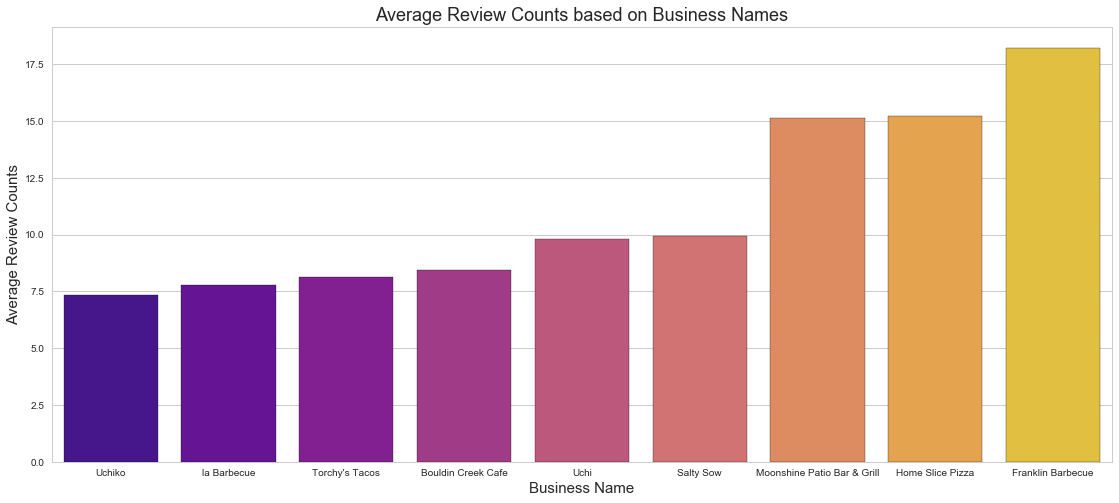

In [307]:
plt.figure(figsize=(19,8))
sns.set_style('whitegrid')
sns.barplot(df_Yelp_Top_Five_Review_Counts['Business_Name'],df_Yelp_Top_Five_Review_Counts['%_Review_Counts'],data=df_Yelp_Top_Five_Review_Counts,palette='plasma')
plt.xlabel('Business Name',fontsize=(15))
plt.rcParams["patch.force_edgecolor"] = True
plt.ylabel('Average Review Counts',fontsize=(15))
plt.title('Average Review Counts based on Business Names',fontsize=(18));

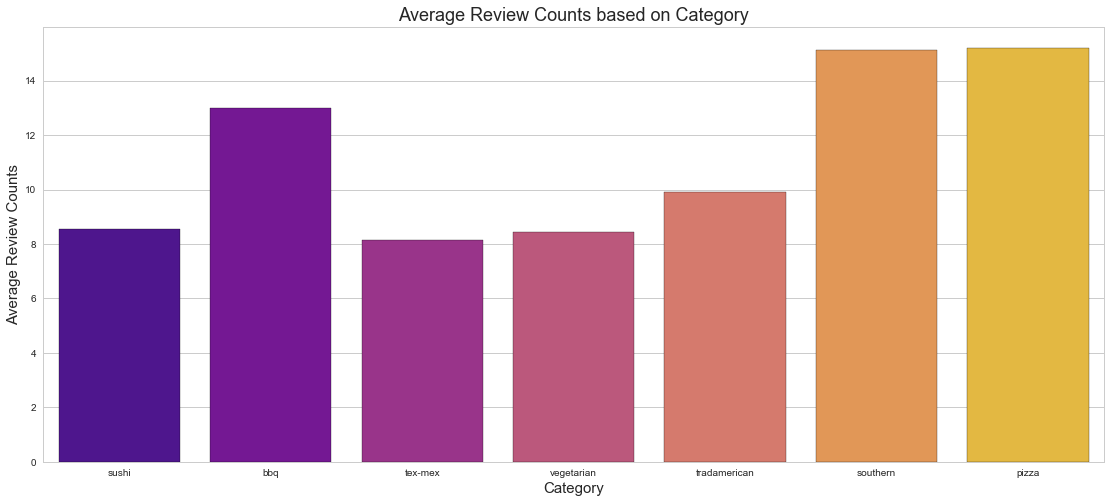

In [308]:
plt.figure(figsize=(19,8))
sns.set_style('whitegrid')
sns.barplot(df_Yelp_Top_Five_Review_Counts['Category'],df_Yelp_Top_Five_Review_Counts['%_Review_Counts'],data=df_Yelp_Top_Five_Review_Counts,palette='plasma',ci=None)
plt.xlabel('Category',fontsize=(15))
plt.rcParams["patch.force_edgecolor"] = True
plt.ylabel('Average Review Counts',fontsize=(15))
plt.title('Average Review Counts based on Category',fontsize=(18));

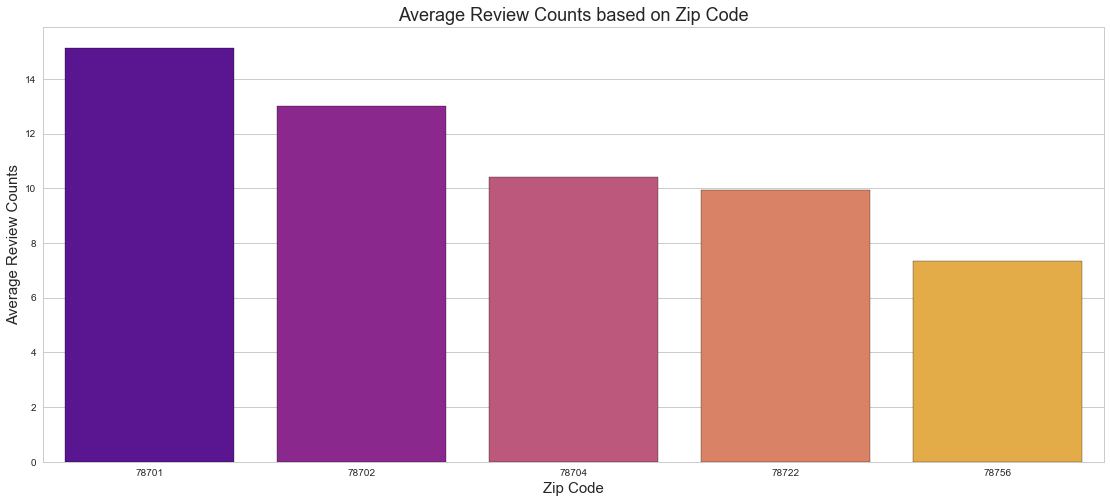

In [309]:
plt.figure(figsize=(19,8))
sns.set_style('whitegrid')
sns.barplot(df_Yelp_Top_Five_Review_Counts['Zip'],df_Yelp_Top_Five_Review_Counts['%_Review_Counts'],data=df_Yelp_Top_Five_Review_Counts,palette='plasma',ci=None)
plt.xlabel('Zip Code',fontsize=(15))
plt.ylabel('Average Review Counts',fontsize=(15))
plt.rcParams["patch.force_edgecolor"] = True
plt.title('Average Review Counts based on Zip Code',fontsize=(18));

<h3><u>Bottom 3 Business based on Reviews </u></h3>

In [297]:
df_Yelp_API[df_Yelp_API.Review_Counts <= 4]

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,Yelp_Url,Price,First_Timestamp,First_Review,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Timestamp,Second_Review,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Timestamp,Third_Review,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
177,austin-hindu-temple-austin,Austin Hindu Temple,5.0,hindu_temples,Austin,4,TX,78724,https://www.yelp.com/biz/austin-hindu-temple-a...,NaN,2015-09-29 09:03:32,This place is beautiful! They are still under ...,19,2,0.342,0.000,0.658,0.7745,2015-11-11 07:18:44,Still under construction. .this place is in ki...,28,2,0.163,0.000,0.837,0.5994,2016-07-03 13:30:18,It is a very nice place. I like the peace of t...,26,3,0.442,0.000,0.558,0.9254
178,sidekick-pet-care-recreation-austin,Sidekick Pet Care + Recreation,5.0,dogwalkers,Austin,4,TX,78724,https://www.yelp.com/biz/sidekick-pet-care-rec...,NaN,2017-08-24 18:05:56,We've been using Clint with Sidekick for sever...,34,3,0.247,0.000,0.753,0.8020,2015-01-30 13:54:55,Seriously. Clint is the best. He's helped us a...,36,4,0.222,0.048,0.730,0.8020,2015-02-08 10:19:01,The only bad part about using Clint is that my...,37,3,0.103,0.154,0.743,-0.2003
179,oldies-but-goodies-austin,Oldies But Goodies,5.0,partyequipmentrentals,Austin,4,TX,78724,https://www.yelp.com/biz/oldies-but-goodies-au...,NaN,2016-01-16 14:00:00,I called Brandon last week to fix one of our p...,31,2,0.175,0.000,0.825,0.6249,2013-09-26 14:02:21,Brandon was friendly and informative. He expla...,27,3,0.214,0.000,0.786,0.7184,2009-07-14 12:40:34,Can't say enough about Brandon and his passion...,35,2,0.094,0.000,0.906,0.4588
1134,james-turrells-skyspace-austin,James Turrell's Skyspace,5.0,galleries,Austin,4,TX,78712,https://www.yelp.com/biz/james-turrells-skyspa...,$,2017-03-01 16:02:16,I have been following Turrell's pieces for awh...,34,2,0.000,0.189,0.811,-0.6801,2016-10-08 16:27:38,"Very cool spot, but be mindful you'll have to ...",41,3,0.158,0.000,0.842,0.6855,2015-07-19 02:17:04,The James Turrell Skyspace is located on the t...,30,2,0.000,0.000,1.000,0.0000
1135,shannon-sledge-dash-realty-austin,Shannon Sledge - Dash Realty,5.0,realestateagents,Austin,4,TX,78712,https://www.yelp.com/biz/shannon-sledge-dash-r...,NaN,2017-04-25 08:11:25,"If you need to find the perfect place to live,...",35,3,0.113,0.000,0.887,0.5719,2017-04-12 18:40:09,Shannon has helped me out a couple of times! S...,22,3,0.432,0.000,0.568,0.8713,2017-04-12 13:23:25,Shannon was very kind and knowledgeable. I fel...,27,3,0.346,0.000,0.654,0.8906
1144,h-j-lutcher-stark-center-for-physical-culture-...,H.J. Lutcher Stark Center for Physical Culture...,5.0,museums,Austin,3,TX,78712,https://www.yelp.com/biz/h-j-lutcher-stark-cen...,NaN,2016-01-03 14:52:44,This is a great place for fans of strong men a...,29,2,0.283,0.000,0.717,0.8442,2010-05-30 14:04:46,"*This review is for the ""Our Body Within"" exhi...",34,2,0.182,0.088,0.729,0.4767,2011-05-16 17:55:31,"This rating is for the ""Our Body - The Univers...",32,3,0.153,0.000,0.847,0.5848


<h3><u>Top Compaines based on Compund Sentiment</u></h3>

In [322]:
df_Yelp_API[df_Yelp_API['First_Review_Sentiment metric_Compound'] >=.8]

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,Yelp_Url,Price,First_Timestamp,First_Review,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Timestamp,Second_Review,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Timestamp,Third_Review,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,109,TX,78735,https://www.yelp.com/biz/toast-entertainment-a...,NaN,2017-11-14 10:04:52,ToastEnt was the PERFECT match for our wedding...,33,2,0.216,0.000,0.784,0.8001,2017-12-04 19:23:01,I can't even tell you how pleased we were with...,37,3,0.246,0.000,0.754,0.8583,2017-10-23 18:36:18,I was very impressed with how professional our...,33,3,0.329,0.000,0.671,0.9149
10,summer-rydel-dds-a-summer-smile-austin,"Summer Rydel, DDS - A Summer Smile",5.0,cosmeticdentists,Austin,30,TX,78735,https://www.yelp.com/biz/summer-rydel-dds-a-su...,NaN,2017-06-18 21:04:36,Dr. Rydel and her staff at A Summer Smile are ...,32,3,0.492,0.000,0.508,0.9545,2017-10-18 11:54:20,"Love, love, love, love this dentist! I never ...",36,3,0.491,0.000,0.509,0.9694,2016-08-23 05:25:41,9/27/2017 every visit is better than the last!...,36,4,0.305,0.000,0.695,0.8647
11,third-coast-home-inspection-austin,Third Coast Home Inspection,5.0,home_inspectors,Austin,43,TX,78749,https://www.yelp.com/biz/third-coast-home-insp...,NaN,2017-11-04 06:23:34,Craig came highly recommended by our realtor a...,30,2,0.294,0.000,0.706,0.8298,2017-11-05 05:12:11,Craig was a recommendation from my realtor and...,30,3,0.145,0.000,0.855,0.5994,2017-07-20 04:13:07,My family and I moved from out of state to Tex...,34,4,0.000,0.000,1.000,0.0000
15,texas-honey-ham-company-west-lake-hills,Texas Honey Ham Company,4.5,sandwiches,West Lake Hills,195,TX,78746,https://www.yelp.com/biz/texas-honey-ham-compa...,$,2017-10-28 11:28:16,"Really delicious food, ample servings and frie...",28,2,0.385,0.000,0.615,0.8977,2017-10-16 17:00:20,I like this place. It's very Austin with a hi...,34,3,0.262,0.067,0.671,0.7506,2017-09-23 06:51:07,I found this spot on yelp. Thanks\nAs I walked...,37,3,0.242,0.000,0.758,0.7906
18,jack-allens-kitchen-oak-hill-austin-2,Jack Allen's Kitchen Oak Hill,4.5,tradamerican,Austin,1300,TX,78735,https://www.yelp.com/biz/jack-allens-kitchen-o...,$$,2017-11-25 21:58:59,Can't get much better farm to table bang for t...,31,3,0.320,0.070,0.610,0.8620,2017-09-25 17:23:08,I can't say enough good things about Jack Alle...,34,2,0.000,0.144,0.856,-0.4949,2017-09-19 09:43:34,I came here after hearing about this place var...,31,3,0.236,0.000,0.764,0.7959
21,pure-skin-spa-austin,Pure Skin Spa,5.0,skincare,Austin,26,TX,78749,https://www.yelp.com/biz/pure-skin-spa-austin?...,$$,2017-10-12 16:21:30,I come here to get the lash lift/tint and I wo...,36,2,0.248,0.000,0.752,0.8217,2017-08-25 15:23:09,If i could give Heather a thousand stars I wou...,38,3,0.000,0.125,0.875,-0.5721,2015-01-13 12:36:33,I just moved to Austin but have been coming he...,33,2,0.157,0.000,0.843,0.7351
22,d-lites-austin,D'Lites,4.5,icecream,Austin,119,TX,78749,https://www.yelp.com/biz/d-lites-austin?hrid=C...,$,2017-11-01 09:53:52,What an awesome place. The owner was super h...,33,3,0.286,0.000,0.714,0.8957,2017-08-07 11:22:18,Chocolate/Vanilla swirl with chocolate sprinkl...,32,3,0.107,0.192,0.701,-0.3753,2017-05-31 22:03:25,I am incredibly thankful to have found a low c...,33,2,0.083,0.156,0.762,-0.0525
23,via-313-pizza-austin-5,Via 313 Pizza,4.5,italian,Austin,48

<h3><u>Bottom Compaines based on Compund Sentiment</u></h3>

In [317]:
df_Yelp_API[df_Yelp_API['First_Review_Sentiment metric_Compound'] <= -.8]

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,Yelp_Url,Price,First_Timestamp,First_Review,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Timestamp,Second_Review,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Timestamp,Third_Review,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
158,the-gardeners-feast-austin,The Gardener's Feast,4.5,farmersmarket,Austin,21,TX,78724,https://www.yelp.com/biz/the-gardeners-feast-a...,$,2013-09-20 18:48:06,When I'm trapped at school without having pack...,35,2,0.000,0.231,0.769,-0.8176,2016-05-23 18:09:06,I became obsessed with tamales upon moving to ...,35,3,0.194,0.213,0.593,-0.1703,2010-05-29 10:18:47,Saturday mornings are my day for Farmers Marke...,33,2,0.132,0.000,0.868,0.6249
254,alamo-austin-air-conditioning-and-heating-austin,Alamo Austin Air Conditioning & Heating,5.0,hvac,Austin,58,TX,78748,https://www.yelp.com/biz/alamo-austin-air-cond...,NaN,2017-11-01 06:06:39,I was in an horrific accident September 20th. ...,37,5,0.000,0.266,0.734,-0.8555,2017-07-11 12:33:45,Fantastic response & service!\n\nI had noticed...,30,3,0.282,0.000,0.718,0.8243,2017-07-01 10:34:34,I called Alamo about seven 4th of Julys ago be...,35,2,0.000,0.000,1.000,0.0000
278,juiceland-austin-24,JuiceLand,4.5,juicebars,Austin,51,TX,78748,https://www.yelp.com/biz/juiceland-austin-24?h...,$$,2017-10-02 06:40:06,All good Juice/Smoothies are pricey so no comp...,33,4,0.087,0.341,0.572,-0.8133,2017-09-17 07:12:30,This Juiceland location is now the closest to ...,35,3,0.000,0.000,1.000,0.0000,2017-08-23 00:57:13,So good!! \n\nJuiceland is great! It's nice to...,38,4,0.334,0.055,0.612,0.8255
399,forest-family-dentistry-north-austin-3,Forest Family Dentistry North,5.0,generaldentistry,Austin,63,TX,78759,https://www.yelp.com/biz/forest-family-dentist...,NaN,2017-10-21 12:57:15,I hate the dentist. Absolutely hate them. I ha...,37,3,0.069,0.325,0.606,-0.8519,2017-10-21 16:05:24,I followed Dr. Rick from the Anderson location...,29,3,0.177,0.000,0.823,0.5445,2017-09-27 18:00:29,By far the best dentistry in Austin and surrou...,28,3,0.344,0.000,0.656,0.9001
531,northland-dental-studio-austin-2,Northland Dental Studio,5.0,generaldentistry,Austin,46,TX,78731,https://www.yelp.com/biz/northland-dental-stud...,NaN,2017-06-01 12:53:44,"I have SEVERE dental anxiety, I usually cry du...",32,2,0.000,0.368,0.632,-0.8918,2017-10-24 08:22:08,Dr Holt is very professional and friendly. \nS...,29,4,0.354,0.000,0.646,0.9106,2017-03-13 11:25:30,Both my wife and myself have been coming here ...,33,3,0.295,0.000,0.705,0.8316
657,next-level-chiropractic-and-rehab-austin,Next Level Chiropractic & Rehab,5.0,chiropractors,Austin,23,TX,78757,https://www.yelp.com/biz/next-level-chiropract...,NaN,2017-09-07 09:30:56,I cannot say enough good things about this pla...,38,3,0.000,0.261,0.739,-0.8484,2017-02-02 14:30:45,I am a dancer. Being a dancer means my body is...,35,3,0.000,0.000,1.000,0.0000,2017-09-14 10:22:21,"Thorough, whole-hearted, official, they care i...",39,2,0.151,0.098,0.751,0.2103


(0, 1248)

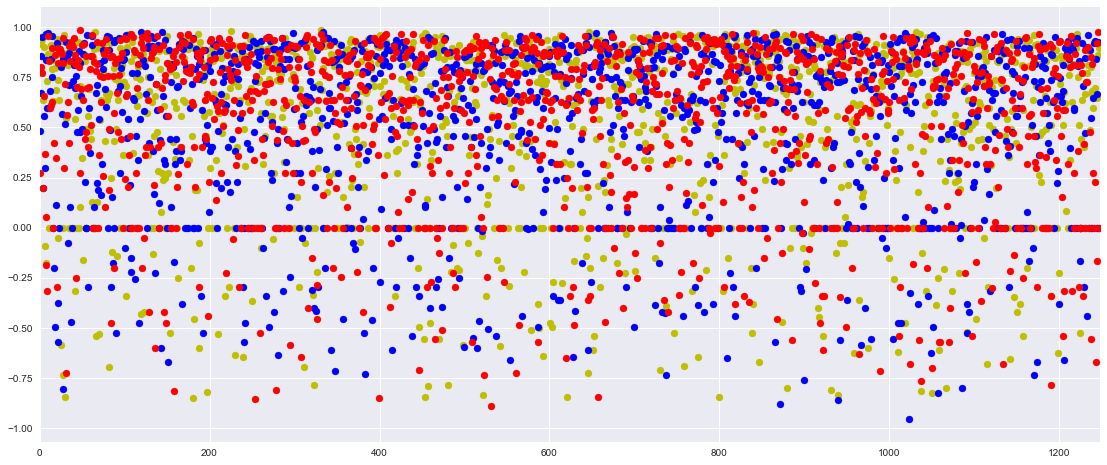

In [72]:

plt.figure(figsize=(19,8))
plt.scatter(x=np.arange(0,df_Yelp_API.shape[0]),y=df_Yelp_API['Third_Review_Sentiment metric_Compound'],c='y')
plt.scatter(x=np.arange(0,df_Yelp_API.shape[0]),y=df_Yelp_API['Second_Review_Sentiment metric_Compound'],c='b')
plt.scatter(x=np.arange(0,df_Yelp_API.shape[0]),y=df_Yelp_API['First_Review_Sentiment metric_Compound'],c='r')
plt.xlim(0,1248)

<h3>Generate a dataframe comparing Sum of Reviews, Crime Count, Average Sentiment Metric, and Average Business Ratings per Zipcode</h3>

<h3><u>Average Total Reviews Table</u></h3>

In [99]:
table_min_max_avg = df_Yelp_API.describe()

In [79]:
pd.DataFrame(table_min_max_avg.iloc[1]).T

,Business_Ratings,Review_Counts,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
mean,4.714458,128.514859,32.746988,2.718072,0.196182,0.030114,0.773706,0.517064,32.840964,2.646586,0.186753,0.02974,0.783519,0.49404,32.630522,2.673896,0.190949,0.03141,0.777639,0.491841


<h3><u>Min Total Reviews Table</u></h3>

In [80]:
pd.DataFrame(table_min_max_avg.iloc[3]).T

,Business_Ratings,Review_Counts,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
min,3.0,3.0,13.0,1.0,0.0,0.0,0.341,-0.8918,9.0,1.0,0.0,0.0,0.337,-0.9545,14.0,1.0,0.0,0.0,0.365,-0.8519


<h3><u>Max Total Reviews Table</u></h3>

In [81]:
pd.DataFrame(table_min_max_avg.iloc[7]).T

,Business_Ratings,Review_Counts,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
max,5.0,3997.0,42.0,9.0,0.659,0.368,1.0,0.986,44.0,9.0,0.654,0.506,1.0,0.9812,44.0,6.0,0.635,0.331,1.0,0.9889


<h3><u>More Tables</u></h3>

In [82]:
#Generated table to include count of a crimes for each zip code

df_crime_zip_code = df_Crime_Austin_2014_to_2016.groupby(['Zip'])['Austin_Offense_Description'].count().reset_index()
df_crime_zip_code.rename_axis({'Austin_Offense_Description':'Number Of Crimes'},axis=1,inplace=True)
df_crime_zip_code.sort_values(by=['Number Of Crimes'],inplace=True)

In [83]:
#Generated table to include  sum of a reviews for each zip code
df_Sum_of_Reviews_Yelp = df_Yelp_API.groupby(['Zip'])['Review_Counts'].sum().reset_index()
df_Sum_of_Reviews_Yelp.rename_axis({'Review_Counts': 'Review Sum'},axis=1,inplace=True)

In [84]:
#Generated table to include average business ratings dataframe for each zip code

df_avg_business_Ratings_Yelp= df_Yelp_API.groupby(['Zip'])['Business_Ratings'].mean().round(2).reset_index()
df_avg_business_Ratings_Yelp.rename_axis({'Business_Ratings': '%_Avg_Business_Ratings'},axis=1,inplace=True)

In [87]:
#Generated table to include average Yelp_Sentiments dataframe for each zip code

df_Yelp_Sentiment_table = df_Yelp_API.groupby(['Zip'])[   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound'].mean().reset_index()


df_Yelp_Sentiment_table.rename_axis({
    'First_Review_Sentiment metric_Positive'    : '%_Avg_First_Review_Sentiment_metric_Positive',
       'First_Review_Sentiment metric_Negative' :'%_Avg_First_Review_Sentiment_metric_Negative',
       'First_Review_Sentiment metric_Neutral'  : '%_Avg_First_Review_Sentiment_metric_Neutral',
       'First_Review_Sentiment metric_Compound' : '%_Avg_First_Review_Sentiment_metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive': '%_Avg_Second_Review_Sentiment_metric_Positive',
       'Second_Review_Sentiment metric_Negative': '%_Avg_Second_Review_Sentiment_metric_Negative',
       'Second_Review_Sentiment metric_Neutral' : '%_Avg_Second_Review_Sentiment_metric_Neutral',
       'Second_Review_Sentiment metric_Compound': '%_Avg_Second_Review_Sentiment_metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive' : '%_Avg_Third_Review_Sentiment_metric_Positive',
       'Third_Review_Sentiment metric_Negative' : '%_Avg_Third_Review_Sentiment_metric_Negative',
       'Third_Review_Sentiment metric_Neutral'  : '%_Avg_Third_Review_Sentiment_metric_Neutral',
       'Third_Review_Sentiment metric_Compound' : '%_Avg_Third_Review_Sentiment_metric_Compound'},axis=1,inplace=True)

df_Yelp_Sentiment_table.style.background_gradient()

,Zip,%_Avg_First_Review_Sentiment_metric_Positive,%_Avg_First_Review_Sentiment_metric_Negative,%_Avg_First_Review_Sentiment_metric_Neutral,%_Avg_First_Review_Sentiment_metric_Compound,%_Avg_Second_Review_Sentiment_metric_Positive,%_Avg_Second_Review_Sentiment_metric_Negative,%_Avg_Second_Review_Sentiment_metric_Neutral,%_Avg_Second_Review_Sentiment_metric_Compound,%_Avg_Third_Review_Sentiment_metric_Positive,%_Avg_Third_Review_Sentiment_metric_Negative,%_Avg_Third_Review_Sentiment_metric_Neutral,%_Avg_Third_Review_Sentiment_metric_Compound
0,78610,0.222,0.0052,0.7728,0.68454,0.2286,0,0.7714,0.67302,0.2726,0.0444,0.683,0.75576
1,78613,0.23687,0.021037,0.742111,0.625928,0.206241,0.0276667,0.76613,0.550339,0.206278,0.026463,0.767259,0.516265
2,78617,0.212556,0.035,0.752444,0.473389,0.174667,0.0258889,0.799333,0.385533,0.242667,0.0363333,0.720889,0.674789
3,78652,0.3445,0.03025,0.62525,0.880975,0,0.0885,0.9115,-0.3639,0.2435,0,0.7565,0.544725
4,78653,0.164056,0.0296667,0.806278,0.42465,0.225278,0.0145,0.760222,0.632433,0.154556,0.0563889,0.789056,0.273983
5,78660,0.17749,0.0378163,0.784633,0.466102,0.168143,0.0203878,0.81151,0.478022,0.13849,0.0314694,0.83,0.33382
6,78701,0.180143,0.0391071,0.780643,0.441232,0.195643,0.0289286,0.7755,0.595182,0.1625,0.0231429,0.814321,0.438557
7,78702,0.19865,0.03265,0.768725,0.525929,0.194813,0.0231,0.782075,0.54238,0.188725,0.02535,0.785937,0.483831
8,78703,0.2,0.0128571,0.787143,0.656414,0.195714,0.049,0.755143,0.438929,0.211571,0.0141429,0.774286,0.642829
9,78704,0.201389,0.0238889,0.774722,0.550059,0.212667,0.0276111,0.759796,0.573935,0.181167,0.0389074,0.779907,0.435948


In [1]:
#Merge all tables together

df_crime_sum_of_reviews= df_crime_zip_code.merge(df_Sum_of_Reviews_Yelp,on=['Zip'],how='outer')
df_crime_sum_avg_business_ratings_yelp = df_crime_sum_of_reviews.merge(df_avg_business_Ratings_Yelp,on=['Zip'],how='outer')
df_table = df_crime_sum_avg_business_ratings_yelp.merge(df_Yelp_Sentiment_table ,on=['Zip'],how='outer')
df_table.shape()

NameError: name 'df_crime_zip_code' is not defined

In [ ]:
cm = sns.light_palette('green',as_cmap=True)
df_table.style.background_gradient(cm)

<h3>Plot for Counts of Crimes per Zip Codes In Austin, Texas</h3>

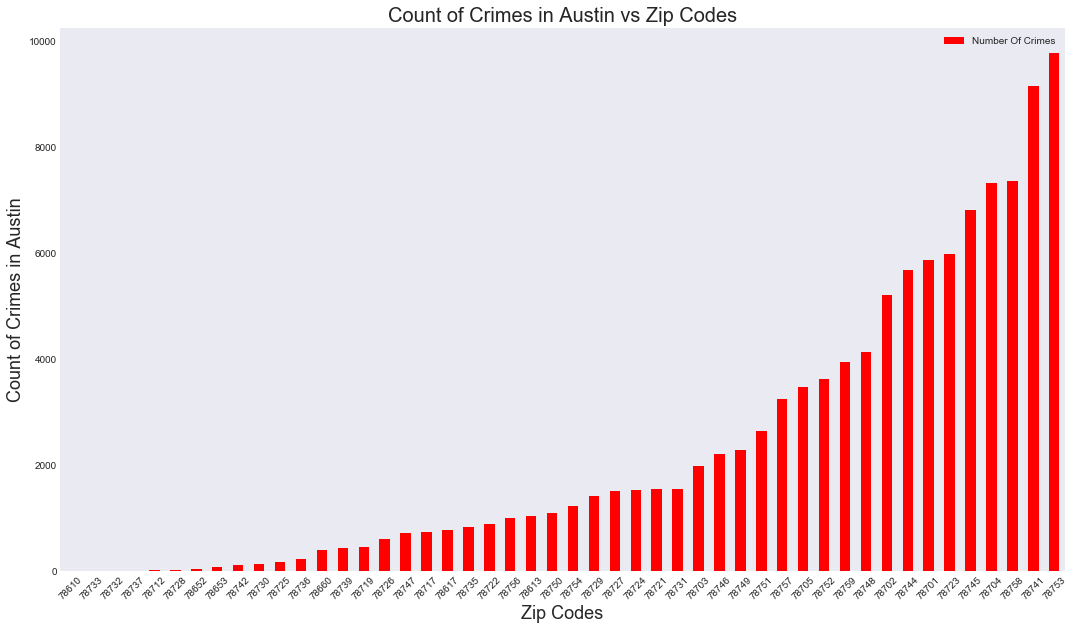

In [81]:
plt.style.use('seaborn-dark')

df_crime_zip_code.plot(x='Zip',y='Number Of Crimes', kind='bar',figsize=(18,10),color=['red','yellow','black']);
plt.xticks(rotation=45);
plt.xlabel('Zip Codes' ,fontsize=(18))
plt.ylabel('Count of Crimes in Austin',fontsize=(18))
plt.title('Count of Crimes in Austin vs Zip Codes',fontsize=(20));